# Finding edges using the Canny algorithm

Edges are a useful image feature that can be used in many computer vision applications. In this recipe, you will learn how to detect edges in images using the Canny algorithm.

Canny edge detection is a very powerful and popular tool in computer vision. It's named after John F. Canny, who proposed the algorithm in 1986. OpenCV implements the algorithm in the function `cv2.Canny`. You must specify two thresholds for gradient magnitude in this function: the first one is used for detecting strong edges, and the second one is used for the hysteresis procedure, where the strong edges are being grown.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S04\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s04\env

d:\html_doc\program\opencv\packt\s04\env\lib\site-packages
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s04\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


In [2]:
# Load the test image
image = cv2.imread('../data/Lena.png')

# Detect the edges using the Canny algorithm
#cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
#   image – single-channel 8-bit input image.
#   edges – output edge map; it has the same size and type as image .
#   threshold1 – first threshold for the hysteresis procedure.
#   threshold2 – second threshold for the hysteresis procedure.
#   apertureSize – aperture size for the Sobel() operator.
#   L2gradient – a flag, indicating whether a more accurate L_2 norm should be used to calculate the image gradient magnitude 
#               ( L2gradient=true ), or whether the default L_1 norm is enough ( L2gradient=false ).
edges = cv2.Canny(image, 200, 100)

------  ../data/Lena.png---------    Shape(512, 512, 3) Lena: uint8
[ [154 148 197] [138 126 192] [125 116 190] [134 122 189] [143 126 194] [113 105 189] [102  89 181] ]
[ [135 150 209] [151 150 204] [164 163 201] [169 174 209] [143 160 208] [145 144 196] [157 150 195] ]
------  show_img = np.copy(img)--    Shape(512, 512) edges: uint8
[ 0 255 255 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 255 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 255 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 255 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 255 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 255 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 

<Figure size 576x360 with 0 Axes>

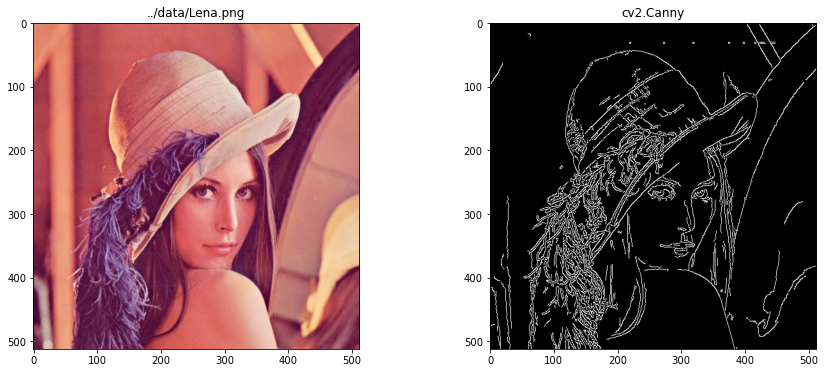

In [ ]:
print_image('../data/Lena.png','Lena',image,45,47,231,238)
print_image('show_img = np.copy(img)','edges',edges,45,60,231,272)

# Visualize the results
plt.figure(figsize=(8,5))
plt_view_image(plt,[["../data/Lena.png",image[:,:,[2,1,0]] ],["cv2.Canny",edges]  ],
               figsize=(15,6), axis='on', cmap='gray'
              )
cv2.imshow('image',image)
cv2.imshow('edges',edges)
cv2.waitKey()
cv2.destroyAllWindows()